A Build of Finiancia Instrument Class: Instatation

In [2]:
import numpy as np

In [3]:
class FiniancialInstrument():
    pass

In [4]:
stock = FiniancialInstrument()

In [5]:
stock

In [6]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        

In [7]:
stock = FiniancialInstrument("AAPL", "2015-01-01", "2019-12-31")

In [8]:
stock

In [9]:
stock.ticker

'AAPL'

The method get_data()

In [11]:
import yfinance as yf

In [12]:
yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [13]:
raw = yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


In [14]:
raw

,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [15]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                                self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [16]:
stock = FiniancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [17]:
stock

FiniancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [18]:
stock.get_data()

[*********************100%***********************]  1 of 1 completed


In [19]:
stock.data

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


The Methods plot_data() & plot_returns()

In [21]:
stock

FiniancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [22]:
stock.data

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


<Axes: xlabel='Date'>

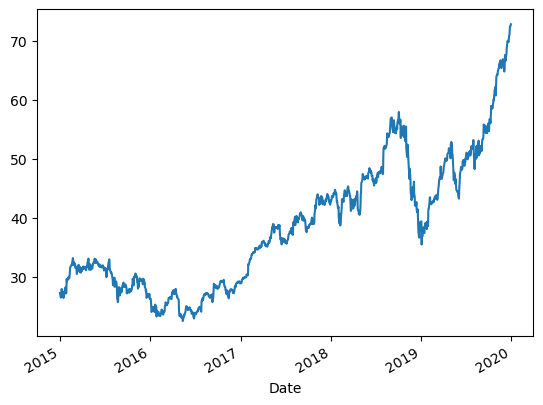

In [23]:
stock.data.price.plot()

In [24]:
stock.data.log_returns.plot()

AttributeError: 'DataFrame' object has no attribute 'log_returns'

In [ ]:
stock.data.log_returns.hist(bins = 100)

In [ ]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()    
        self.log_returns()
    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker,                                                                              self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        return self.data["log_returns"]
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        # plt.title("Price Chart:{}".format(self.ticker), fontsize = 15)
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data['log_returns'].plot(figsize=(12, 8))  # Correct access
        elif kind == "hist":
            self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))


In [ ]:
stock = FiniancialInstrument("aapl", "2015-01-01", "2019-12-31")

In [ ]:
stock.plot_prices()

In [ ]:
# stock.log_returns()
# print(stock.data.head())  

In [ ]:
# stock.plot_returns(kind = "hist")

Encapsulation

In [ ]:
stock

In [ ]:
stock.plot_prices()

In [ ]:
stock.ticker

In [ ]:
stock.ticker = "GE"

In [ ]:
stock.ticker

In [ ]:
stock.plot_prices()

In [ ]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker,                                                                              self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        return self.data["log_returns"]
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        # plt.title("Price Chart:{}".format(self.ticker), fontsize = 15)
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data['log_returns'].plot(figsize=(12, 8))  # Correct access
        elif kind == "hist":
            self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))

In [ ]:
stock = FiniancialInstrument("aapl", "2015-01-01", "2019-12-31")

In [ ]:
stock

In [ ]:
stock.ticker

The method set_ticker()

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        if ticker is not None:
            self._ticker = ticker  # Store the ticker in the private _ticker attribute
            self.start = start
            self.end = end
            self.get_data()
            self.log_returns()

    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker,
                                                                                self.start, self.end)

    def get_data(self):
        # Use the private _ticker attribute
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw

    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        return self.data["log_returns"]

    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        # plt.title("Price Chart:{}".format(self._ticker), fontsize = 15)

    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data['log_returns'].plot(figsize=(12, 8))
        elif kind == "hist":
            self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))

    def set_ticker(self, ticker=None):
        if ticker is not None:
            self._ticker = ticker  # Update the private _ticker attribute
            self.get_data()  # Fetch new data for the new ticker
            self.log_returns()  # Recompute log returns for the new data

# Example usage:
stock = FiniancialInstrument("AAPL", "2015-01-01", "2019-12-31")
stock.set_ticker("GE")  # This should work now


In [ ]:
stock.plot_prices()

In [ ]:
stock.set_ticker("GE")

In [ ]:
stock.plot_prices()

Adding more methods nad performance metrics

Added mean return

In [ ]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        if ticker is not None:
            self._ticker = ticker  # Store the ticker in the private _ticker attribute
            self.start = start
            self.end = end
            self.get_data()
            self.log_returns()

    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker,
                                                                                self.start, self.end)

    def get_data(self):
        # Use the private _ticker attribute
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw

    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        return self.data["log_returns"]

    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        # plt.title("Price Chart:{}".format(self._ticker), fontsize = 15)

    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data['log_returns'].plot(figsize=(12, 8))
        elif kind == "hist":
            self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))

    def set_ticker(self, ticker=None):
        if ticker is not None:
            self._ticker = ticker  # Update the private _ticker attribute
            self.get_data()  # Fetch new data for the new ticker
            self.log_returns()  # Recompute log returns for the new data

    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resample_price = self.data.price.resample(freq).last()
            resample_returns = np.log(resampled_price / resample_price.shift(1))
            return resample_returns.mean()

    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()

    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [ ]:
stock = FiniancialInstrument("aapl", "2015-01-01", "2019-12-31")

In [ ]:
stock.mean_return()

In [ ]:
stock.std_returns()

In [ ]:
stock.std_returns("YE")

In [ ]:
stock.annualized_perf()

Inheritance

In [2]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        if ticker is not None:
            self._ticker = ticker  
            self.start = start
            self.end = end
            self.get_data()
            self.log_returns()

    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker,
                                                                                self.start, self.end)

    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw

    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        return self.data["log_returns"]

    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        # plt.title("Price Chart:{}".format(self._ticker), fontsize = 15)

    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data['log_returns'].plot(figsize=(12, 8))
        elif kind == "hist":
            self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))

    def set_ticker(self, ticker=None):
        if ticker is not None:
            self._ticker = ticker  # Update the private _ticker attribute
            self.get_data()  # Fetch new data for the new ticker
            self.log_returns()  # Recompute log returns for the new data

    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resample_price = self.data.price.resample(freq).last()
            resample_returns = np.log(resampled_price / resample_price.shift(1))
            return resample_returns.mean()

    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()

    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [36]:
import yfinance as yf
import numpy as np

class RiskReturn(FiniancialInstrument): # Inheritce the FiniancialInstrument code. 
    # def __init__(self, ticker, start, end):
    #     self._ticker = ticker  # Store the ticker in the private _ticker attribute
    #     self.start = start
    #     self.end = end
    #     self.get_data()
    #     self.log_returns()
    # def __repr__(self):
    #     return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker,
    #                                                                             self.start, self.end)
    # def get_data(self):
    #     # Use the private _ticker attribute
    #     raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
    #     raw.rename(columns = {"Close":"price"}, inplace = True)
    #     self.data = raw

    # def log_returns(self):
    #     self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
    #     return self.data["log_returns"]

    # def plot_prices(self):
    #     self.data.price.plot(figsize=(12, 8))
    #     # plt.title("Price Chart:{}".format(self._ticker), fontsize = 15)

    # def plot_returns(self, kind="ts"):
    #     if kind == "ts":
    #         self.data['log_returns'].plot(figsize=(12, 8))
    #     elif kind == "hist":
    #         self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))
    # def set_ticker(self, ticker = None):
    #     if ticker is not None:
    #         self._ticker = ticker
    #         self.get_data()
    #         self.log_returns()
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
            
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()

    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))
            

In [38]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [40]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


In [42]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


In [46]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


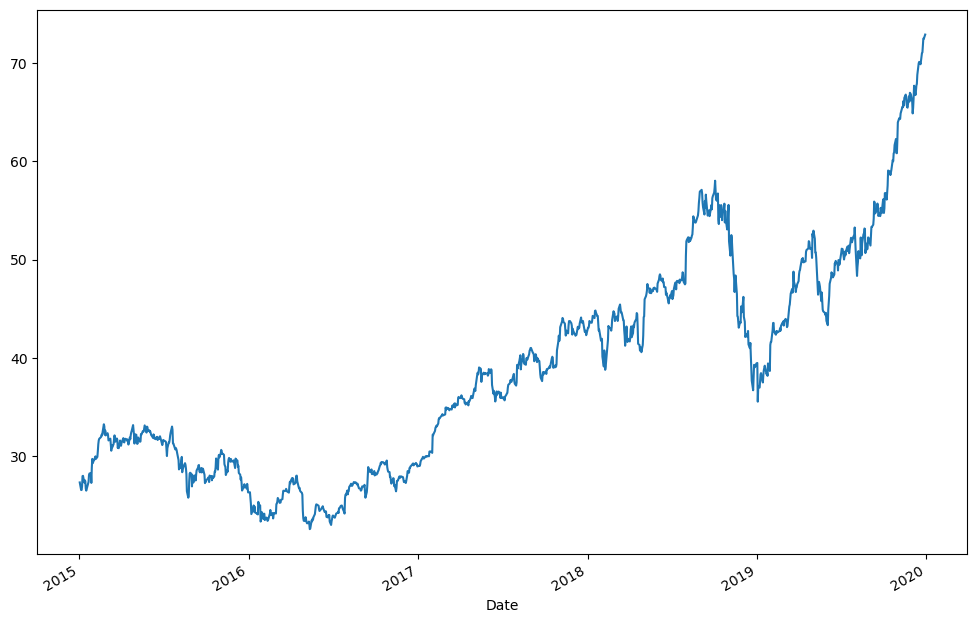

In [48]:
stock.plot_prices()